In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/341-2.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/236-2.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/156.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/650-2.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/1714-01.jpg
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/1051-3(94).jpg
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/680.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/933-2.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/1540-4.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Training/311-2.JPG
/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Tra

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import cv2 as cv
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_dir = '/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data'  # Update this to your dataset directory
output_dir = '/kaggle/working/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'valid'), exist_ok=True)

classes = ['Cancer', 'Non_Cancer']

for class_name in classes:
    class_dir = os.path.join(data_dir,class_name,"Training")

    os.makedirs(os.path.join(output_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'valid', class_name), exist_ok=True)

    files = os.listdir(class_dir)

    random.shuffle(files)

    num_train = int(0.8 * len(files))

    for file in files[:num_train]:
        source_path = os.path.join(class_dir, file)
        dest_path = os.path.join(output_dir, 'train', class_name, file)
        shutil.copyfile(source_path, dest_path)

    for file in files[num_train:]:
        source_path = os.path.join(class_dir, file)
        dest_path = os.path.join(output_dir, 'valid', class_name, file)
        shutil.copyfile(source_path, dest_path)

print("Data preprocessing for binary classification complete.")


Data preprocessing for binary classification complete.


In [4]:
data_dir = '/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data'  # Update this to your dataset directory
output_dir = '/kaggle/working/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)


classes = ['Cancer', 'Non_Cancer']

for class_name in classes:
    class_dir = os.path.join(data_dir,class_name,"Testing")

    os.makedirs(os.path.join(output_dir, 'test', class_name), exist_ok=True)

    files = os.listdir(class_dir)

    for file in files:
        source_path = os.path.join(class_dir, file)
        dest_path = os.path.join(output_dir, 'test', class_name, file)
        shutil.copyfile(source_path, dest_path)

print("Data preprocessing for binary classification complete.")


Data preprocessing for binary classification complete.


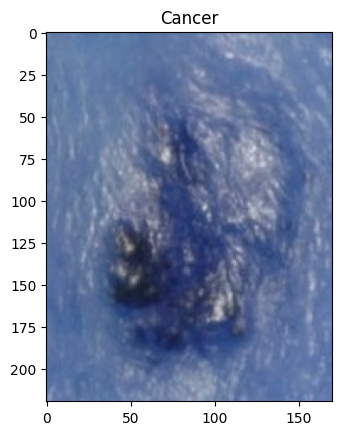

In [5]:
img=cv.imread("/kaggle/working/train/Cancer/1031-1.jpg")
plt.imshow(img)
plt.title("Cancer")         
plt.show()

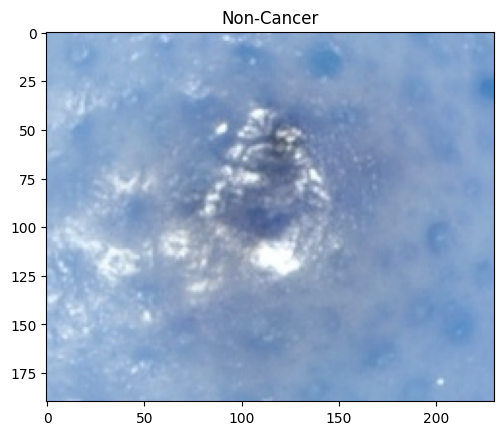

In [6]:
img=cv.imread("/kaggle/working/train/Non_Cancer/694-03.JPG")
plt.imshow(img)
plt.title("Non-Cancer")         
plt.show()

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory="/kaggle/working/train", target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory="/kaggle/working/valid", target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory="/kaggle/working/test", target_size=(224,224), batch_size=10)

Found 66 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [8]:
mobile=tf.keras.applications.mobilenet_v2.MobileNetV2()
mobile.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

In [9]:
x=mobile.layers[-5].output

In [10]:
x=tf.keras.layers.Flatten()(x)
output=Dense(units=2,activation="softmax")(x)

In [11]:
model=Model(inputs=mobile.input,outputs=output)

In [12]:
for layer in mobile.layers[:22]:
    layer.trainable=False

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [14]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=20,
            verbose=2
)

Epoch 1/20
7/7 - 31s - loss: 1.0519 - accuracy: 0.4545 - val_loss: 1.1932 - val_accuracy: 0.5000 - 31s/epoch - 4s/step
Epoch 2/20
7/7 - 0s - loss: 0.5875 - accuracy: 0.6970 - val_loss: 1.1831 - val_accuracy: 0.4444 - 375ms/epoch - 54ms/step
Epoch 3/20
7/7 - 0s - loss: 0.2230 - accuracy: 0.9242 - val_loss: 1.2097 - val_accuracy: 0.5000 - 391ms/epoch - 56ms/step
Epoch 4/20
7/7 - 0s - loss: 0.1781 - accuracy: 0.9697 - val_loss: 1.2328 - val_accuracy: 0.5556 - 365ms/epoch - 52ms/step
Epoch 5/20
7/7 - 0s - loss: 0.1168 - accuracy: 0.9545 - val_loss: 1.2664 - val_accuracy: 0.5556 - 390ms/epoch - 56ms/step
Epoch 6/20
7/7 - 0s - loss: 0.0937 - accuracy: 0.9848 - val_loss: 1.2867 - val_accuracy: 0.5556 - 384ms/epoch - 55ms/step
Epoch 7/20
7/7 - 0s - loss: 0.0750 - accuracy: 0.9848 - val_loss: 1.3087 - val_accuracy: 0.5556 - 366ms/epoch - 52ms/step
Epoch 8/20
7/7 - 0s - loss: 0.1247 - accuracy: 0.9848 - val_loss: 1.3001 - val_accuracy: 0.5556 - 370ms/epoch - 53ms/step
Epoch 9/20
7/7 - 0s - loss:

In [16]:
test_labels = test_batches.classes

In [17]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [18]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  6  36]
 [ 33 129]]


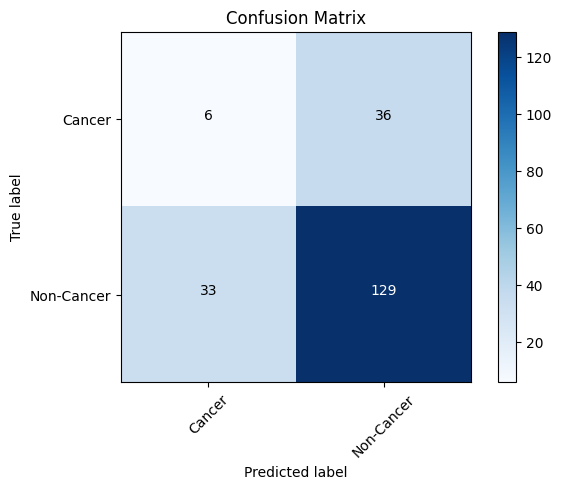

In [20]:
cm_plot_labels=["Cancer","Non-Cancer"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")

In [21]:
model.save("MobileNetV2.h5")

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to match model's expected sizing
    img = img / 255.0  # Normalize pixel values to between 0 and 1
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to your single image
image_path = '/kaggle/input/all-img/cancer-03.jpg'

# Preprocess the image
input_img = preprocess_image(image_path)

# Make predictions
predictions = model.predict(input_img)

# Assuming binary classification (2 classes), get the predicted class
predicted_class = np.argmax(predictions, axis=1)[0]

# Map the predicted class index to class label
if predicted_class == 0:
    class_label = 'Cancer'
else:
    class_label = 'Non-Cancer'
print(class_label)


1/1 [==============================] - 0s 25ms/step
Cancer


In [38]:
# Evaluate model on test dataset
test_loss, test_accuracy = model.evaluate(test_batches, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")

21/21 [==============================] - 1s 27ms/step - loss: 0.5418 - accuracy: 0.7794
Test Accuracy: 0.7794
